In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe', options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_7108\3449289060.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


In [3]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [4]:
# selenium 4 버전 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [5]:
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [6]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [7]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [8]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [9]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [10]:
gu_list = list(set(df_star["구"]))
gu_list

['동대문구',
 '구로구',
 '강남구',
 '성북구',
 '강북구',
 '영등포구',
 '송파구',
 '서초구',
 '노원구',
 '성동구',
 '강서구',
 '마포구',
 '관악구',
 '광진구',
 '은평구',
 '용산구',
 '금천구',
 '도봉구',
 '중랑구',
 '중구',
 '양천구',
 '동작구',
 '종로구',
 '서대문구',
 '강동구']

In [11]:
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome("./chromedriver.exe", options=options)
driver.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_7108\1177500784.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("./chromedriver.exe", options=options)


In [ ]:
# 이건 안됨

driver.find_element_by_xpath('//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
driver.find_element_by_xpath('//*[@id="keyword"]').clear
driver.find_element_by_xpath('//*[@id="keyword"]').send_keys("서울 강남구")
driver.find_element_by_xpath('//*[@id="keyword_div"]/form/button').click()

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info

In [12]:
edi_info = []



for gu in gu_list:
    driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH, '//*[@id="keyword"]').clear
    driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

707

In [13]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
702,연희삼거리점,서대문구,서울 서대문구 연희로 117 (연희동)
703,이화여대점,서대문구,"서울 서대문구 이화여대길 26 (대현동, 이화빌딩)"
704,충정로3가점,서대문구,"서울 서대문구 경기대로 26-26 (충정로3가, 더스타일하우스디센트럴)"
705,홍은사거리점,서대문구,"서울 서대문구 통일로 510 (홍은동, 북한산 더샵)"
706,홍제역점,서대문구,서울 서대문구 홍제동


In [14]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,동대문구,9
1,구로구,12
2,강남구,89
3,성북구,15
4,강북구,6
5,영등포구,41
6,송파구,34
7,서초구,48
8,노원구,13
9,성동구,13


In [15]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,동대문구,25
1,구로구,28
2,강남구,44
3,성북구,32
4,강북구,20
5,영등포구,41
6,송파구,39
7,서초구,29
8,노원구,62
9,성동구,0


In [16]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,동대문구,25,9,16
1,구로구,28,12,16
2,강남구,44,89,-45
3,성북구,32,15,17
4,강북구,20,6,14
5,영등포구,41,41,0
6,송파구,39,34,5
7,서초구,29,48,-19
8,노원구,62,13,49
9,성동구,0,13,-13


In [24]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_7108\3681494351.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [26]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmb10',
 'cmss10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmsy10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'STIXSizeTwoSym',
 'DejaVu Serif Display',
 'cmr10',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmex10',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'cmtt10',
 'Lucida Handwriting',
 'Courier New',
 'Berlin Sans FB Demi',
 'Elephant',
 'Franklin Gothic Heavy',
 'Yu Gothic',
 'Old English Text MT',
 'Imprint MT Shadow',
 'Magic R',
 'Microsoft Himalaya',
 'Script MT Bold',
 'Bodoni MT',
 'Microsoft Tai Le',
 'Palatino Linotype',
 'Bookman Old Style',
 'Onyx',
 'Georgia',
 'MS Reference Sans Serif'

In [28]:
# 음수 표시가 개져서 나올 때
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

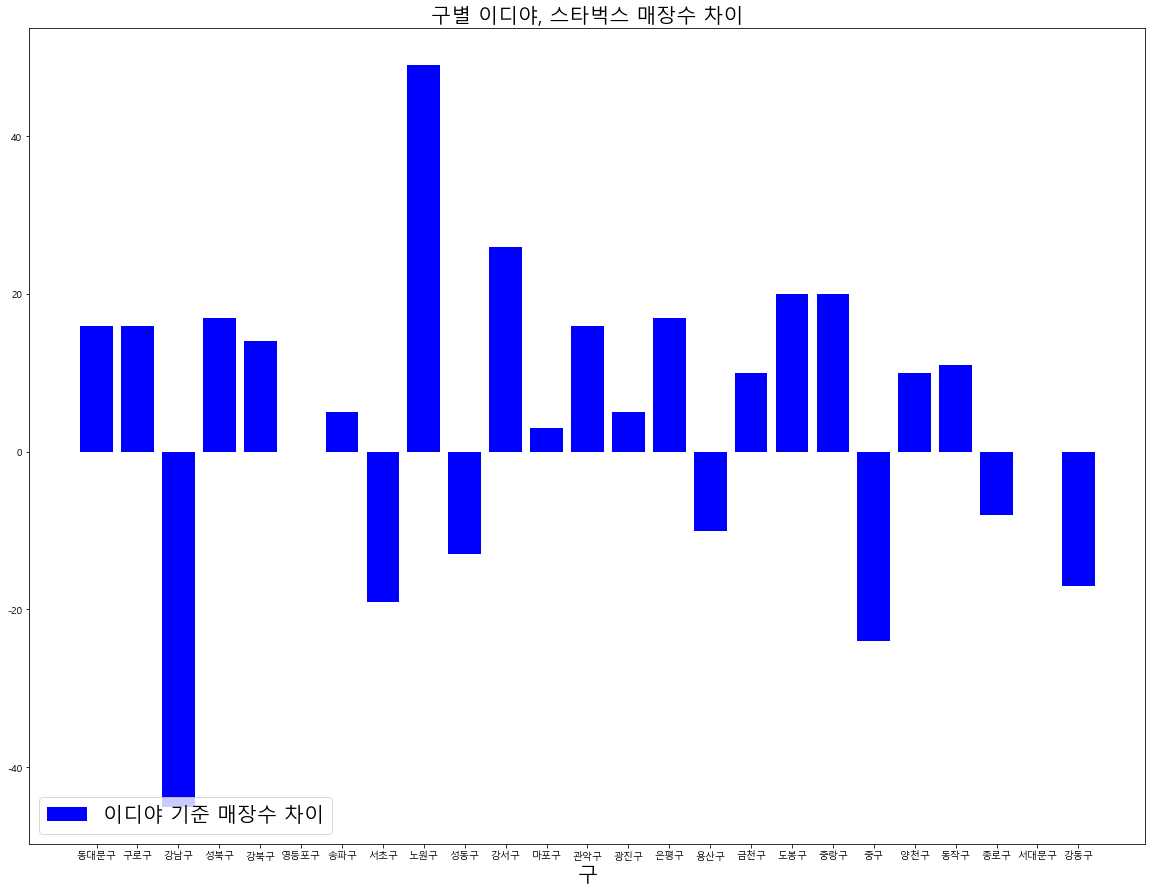

In [29]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()